In [5]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Para upload de arquivos no Colab
from google.colab import files

classe de leitura do dataset, estamos usando a entrada de arquivo do google colab mas pode ser editado para um caminho do seu sistema

metricas de avaliação ROC

conhecido como Curva de característica de operação do receptor

algortimos de classificacao

**Relação com a Área Sob a Curva (AUC-ROC)**

A **AUC-ROC** (Área Sob a Curva ROC) mede a capacidade do modelo de distinguir entre classes. Quanto maior a AUC (próxima de 1), melhor o modelo. A fórmula da AUC é calculada integrando a curva ROC:

$$
\text{AUC} = \int_{0}^{1} \text{TPR}(\text{FPR}) \, d(\text{FPR})
$$

tratamento de dados

Função para tratamento de dados nulos

Função para codificação de variáveis categóricas

input e visualização dos dados ja tratados, para o teste de performace

In [9]:
data = pd.read_csv("/content/campeonatos_futebol_atualizacao sem limpezacsv.csv")
data.head()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


In [10]:
data.dtypes.value_counts()

,count
float64,36
object,4


A visualização dos tipos que são diferentes de objetos

In [11]:
data.columns[data.dtypes != 'object']

Index(['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
       'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
       'Faltas 1', 'Faltas 2', 'Cartões amarelos 1', 'Cartões amarelos 2',
       'Cartões vermelhos 1', 'Cartões vermelhos 2', 'Cruzamentos 1',
       'Cruzamentos 2', 'Laterais 1', 'Laterais 2', 'Chutes bloqueados 1',
       'Chutes bloqueados 2', 'Contra-ataques 1', 'Contra-ataques 2', 'Gols 1',
       'Gols 2', 'Tiro de meta 1', 'Tiro de meta 2', 'Tratamentos 1',
       'Tratamentos 2', 'Substituições 1', 'Substituições 2', 'Tiros-livres 1',
       'Tiros-livres 2', 'Defesas difíceis 1', 'Defesas difíceis 2',
       'Posse 1(%)', 'Posse 2(%)'],
      dtype='object')

fazendo a remoçao do objeto em todo dataset para aplicar o trenamento

In [18]:
data_encoded = pd.get_dummies(data,columns=['Time 1', 'Time 2', 'Position 1', 'Position 2'],  # ou todas as colunas object
    drop_first=True    )

In [13]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [14]:
data.columns[data.dtypes == 'object']

Index(['Time 1', 'Time 2', 'Position 1', 'Position 2'], dtype='object')

In [15]:
treino_nr = data.columns[data.dtypes!= 'object']

definimos o nosso Y que sera a a saida do nosso codigo

nesse caso podemos subistuir para fazer a previsão com classificacao dos times que algoritmos de classifcacao como randomflorest se saira melhor

In [16]:
data['winner'] = np.where(data['Gols 1'] > data['Gols 2'], 1,
                 np.where(data['Gols 1'] < data['Gols 2'], -1, 0))
label = 'winner' #definindo quem venceu na previsao

Separando a base de treino em X e Y, para prever o numero de gols e medir a performace dessa predição, a construção de X(features) e y(labels)

In [19]:
x = data_encoded.drop(columns=[label])
y = data_encoded[label]

Separação das variaveis entre teste e validação

os parametros test_size estamos defindo a quantidade de 33 porcento do dataframe para testes o resto para a validacao e o random stage --- fazer

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.33, random_state=42)

Teste do primeiro algoritmo - Random florest

estamos usando o make_classification para generalizar o nosso data set

O algortimo que estamos usando seria RANDOM FLOREST CLASSIFIER

Uma floresta aleatória (random forest) é criada construindo um conjunto de árvores de decisão, cada uma das quais toma decisões ligeiramente diferentes.
No momento do teste (classificação), uma nova amostra é classificada por cada uma das árvores da floresta aleatória, e as distribuições de classes nos nós-folha finais são médias para fornecer uma resposta mais precisa do que seria possível com apenas uma única árvore (com uma profundidade fixa).

###  Previsão da Floresta Aleatória


#### Para classificação:

A previsão final \( \hat{y} \) é feita pela votação majoritária (**modo**):

$$
\hat{y} = \text{modo}(h_1(x), h_2(x), \dots, h_T(x))
$$

#### Para regressão:

A previsão final \( \hat{y} \) é feita pela **média das saídas** das árvores:

$$
\hat{y} = \frac{1}{T} \sum_{t=1}^{T} h_t(x)
$$

---

### 🔧 Parâmetros de Projeto de uma Floresta Aleatória

- \( D \): profundidade máxima de cada árvore  
- \( T \): número total de árvores na floresta  
- \( \rho \): número de amostras examinadas em cada nó durante a construção


In [22]:

clf_reg = RandomForestRegressor(max_depth=400, random_state=0)
clf_class = RandomForestClassifier(max_depth=420, random_state=42)

treinamento dos dados com o algortimo

1 por regressao

2 por classificação

In [23]:
result_regressor=clf_reg.fit(x_train, y_train)
result_classifcator =clf_class.fit(x_train, y_train)

In [ ]:
y_pred_reg=result_regressor.predict(x_val)
y_pred_class=result_classifcator.predict(x_val)


teste para a acuracia desse algortimo

### 📊 Acurácia

A equação da acurácia é:

$$
\text{Acurácia} = \frac{\text{Número de previsões corretas}}{\text{Número total de previsões}}
$$

Usando a matriz de confusão:

$$
\text{Acurácia} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Onde:

- \( TP \): Verdadeiros Positivos  
- \( TN \): Verdadeiros Negativos  
- \( FP \): Falsos Positivos  
- \( FN \): Falsos Negativos


temos o tratamento para o algoritimo de arvores tanto na regressao quanto na classificação

### 📊 Erro Absoluto Médio (MAE)

A equação do erro absoluto médio (MAE) é:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| \hat{y}_i - y_i \right|
$$

Onde:

- \( \hat{y}_i \): Valor previsto para a \( i \)-ésima amostra  
- \( y_i \): Valor verdadeiro da \( i \)-ésima amostra  
- \( n \): Número total de amostras

O erro absoluto médio mede a média das diferenças absolutas entre os valores previstos e os valores reais, fornecendo uma visão clara da precisão das previsões.


In [ ]:
print(result_regressor.predict(x_val))
mae = mean_absolute_error(y_val, y_pred_reg)
mse = mean_squared_error(y_val, y_pred_reg)
rmse = mse**0.5
r2  = r2_score(y_val, y_pred_reg)

[ 0.  0.  0. ...  1.  1. -1.]


plot do ramdomfloresregressor

R²: 1.000   RMSE: 0.007


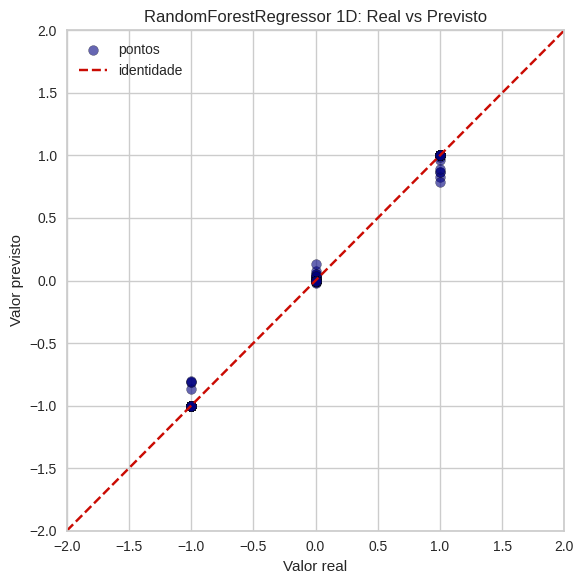

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

#regr recebe a variavel treinada clf
regr = clf_reg

# 2) Previsões
y_pred = regr.predict(x_train)

# 3) Métricas (opcional)
r2   = r2_score(y_train, y_pred)
rmse = np.sqrt(mse)
print(f"R²: {r2:.3f}   RMSE: {rmse:.3f}")

# 4) Scatter real × previsto
plt.figure(figsize=(6,6))
plt.scatter(
    y_train,         # eixo X = valores reais
    y_pred,          # eixo Y = valores previstos
    c="navy",
    alpha=0.6,
    edgecolor="k",
    s=50,
    label="pontos"
)

# 5) Linha identidade
mn = min(y_train.min(), y_pred.min()) - 1
mx = max(y_train.max(), y_pred.max()) + 1
plt.plot([mn, mx], [mn, mx], "r--", label="identidade")

plt.xlim(mn, mx)
plt.ylim(mn, mx)
plt.xlabel("Valor real")
plt.ylabel("Valor previsto")
plt.title("RandomForestRegressor 1D: Real vs Previsto")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("Acurácia:", accuracy_score(y_val, y_pred_class))

Acurácia: 0.9581283480922707


### Precisão (Precision)

A **Precisão**, também chamada de **Valor Preditivo Positivo**, é a fração de instâncias relevantes entre todas as instâncias recuperadas pelo modelo.

$$
\text{Precisão} = \frac{\text{Instâncias relevantes recuperadas}}{\text{Todas as instâncias recuperadas}}
$$

Substituindo os termos pelo vocabulário de classificação binária:

$$
\text{Precisão} = \frac{TP}{TP + FP}
$$

---

### Revocação (Recall ou Sensibilidade)

A **Revocação**, também chamada de **Sensibilidade**, é a fração de instâncias relevantes que foram efetivamente recuperadas pelo modelo.

$$
\text{Recall} = \frac{\text{Instâncias relevantes recuperadas}}{\text{Todas as instâncias relevantes}}
$$

Substituindo pelos termos da matriz de confusão:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

---

### Onde:

- **TP** = True Positives (Verdadeiros Positivos)  
- **FP** = False Positives (Falsos Positivos)  
- **FN** = False Negatives (Falsos Negativos)  

Tanto a **precisão** quanto a **revocação** são baseadas na noção de **relevância** das instâncias classificadas.


teste da matrix de confusão

### F₁ Score (F‑measure / Balanced F-score)

O **F₁ score** é a **média harmônica** entre _precision_ e _recall_, usada para avaliar o desempenho de modelos de classificação.

Fórmula geral:

$$
F_1 = \frac{2}{\frac{1}{\text{recall}} + \frac{1}{\text{precision}}}
$$

Forma mais comum (substituindo as fórmulas de precisão e recall):

$$
F_1 = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
$$

Substituindo por valores de TP, FP e FN:

$$
F_1 = \frac{2 \cdot TP}{2 \cdot TP + FP + FN}
$$

---

### Onde:

- **TP** = True Positives (Verdadeiros Positivos)  
- **FP** = False Positives (Falsos Positivos)  
- **FN** = False Negatives (Falsos Negativos)

- **Precision** = \( \displaystyle \frac{TP}{TP + FP} \)  
- **Recall** = \( \displaystyle \frac{TP}{TP + FN} \)


expplicar sobre suporte

In [ ]:
features = [
    'Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
    'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
    'Faltas 1', 'Faltas 2', 'Cartões amarelos 1', 'Cartões amarelos 2',
    'Cartões vermelhos 1', 'Cartões vermelhos 2', 'Cruzamentos 1',
    'Cruzamentos 2', 'Laterais 1', 'Laterais 2', 'Chutes bloqueados 1',
    'Chutes bloqueados 2', 'Contra-ataques 1', 'Contra-ataques 2',
    'Gols 1', 'Gols 2', 'Tiro de meta 1', 'Tiro de meta 2',
    'Tratamentos 1', 'Tratamentos 2', 'Substituições 1',
    'Substituições 2', 'Tiros-livres 1', 'Tiros-livres 2',
    'Defesas difíceis 1', 'Defesas difíceis 2', 'Posse 1(%)', 'Posse 2(%)'
]

In [ ]:
print(classification_report(y_val, y_pred_class, target_names=['Gols 1','Gols 2','empate']))

              precision    recall  f1-score   support

      Gols 1       0.96      0.97      0.97      2673
      Gols 2       0.96      0.88      0.92      2304
      empate       0.96      0.99      0.97      4170

    accuracy                           0.96      9147
   macro avg       0.96      0.95      0.95      9147
weighted avg       0.96      0.96      0.96      9147



In [ ]:
print(confusion_matrix(y_val, y_pred_class))

[[2597   63   13]
 [ 105 2027  172]
 [   7   23 4140]]


/usr/local/lib/python3.11/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


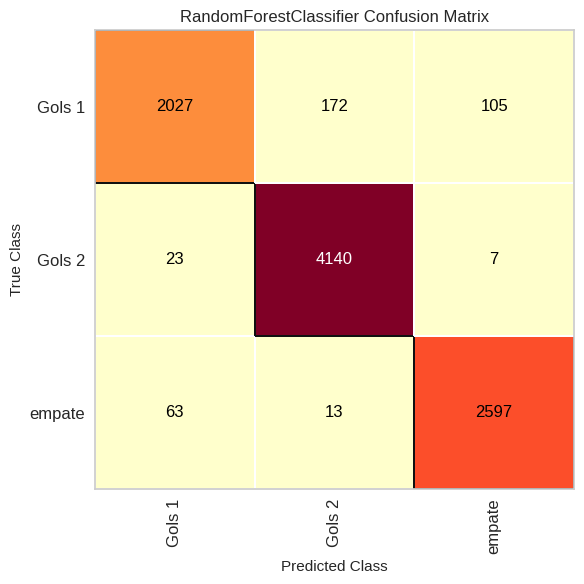

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

confusion_matrix,
mapping = {0:"Gols 1", 1:"Gols 2",2: "empate"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    clf_class,                                      # seu modelo já treinado
    classes=['Gols 1','Gols 2','empate'],             # nome legível das classes
    label_encoder=mapping,                    # converte 0→"Gols 1", 1→"Gols 2"
    ax=ax
)
cm_viz.score(x_val, y_val)
cm_viz.show()

### 1. True Positive Rate (TPR / Sensibilidade)
A **taxa de verdadeiros positivos** indica o quão bem o modelo detecta os positivos reais.
Fórmula:
$$
\text{TPR} = \frac{TP}{TP + FN}
$$
Onde:  
- **TP** = True Positives (Verdadeiros Positivos)  
- **FN** = False Negatives (Falsos Negativos)
---
### 2. False Positive Rate (FPR)
A **taxa de falsos positivos** mostra com que frequência o modelo classifica incorretamente os negativos como positivos.
Fórmula:
$$
\text{FPR} = \frac{FP}{FP + TN}
$$
Onde:  
- **FP** = False Positives (Falsos Positivos)  
- **TN** = True Negatives (Verdadeiros Negativos)

# 🌲 Gradient Boosting

O Gradient Boosting é uma técnica de aprendizado de máquina que constrói um modelo forte somando vários modelos fracos (geralmente árvores de decisão).

Cada nova árvore tenta **corrigir os erros cometidos pelas anteriores**, aprendendo sobre os **resíduos** (diferença entre o valor real e a previsão anterior) ou o **gradiente da função de perda**.

A fórmula geral do modelo é:

$$
F_M(x) = F_0(x) + \sum_{m=1}^{M} \nu \cdot \gamma_m h_m(x)
$$

Onde:

- $$F_0(x)$$: predição inicial (ex: média dos valores),
- $$M$$: número de iterações (ou árvores),
- $$h_m(x)$$: a árvore treinada na iteração $$m$$,
- $$\gamma_m$$: o peso (ou passo ideal) da árvore,
- $$\nu$$: taxa de aprendizado (controla o quanto o modelo aprende em cada passo).

---

### 🧪 Exemplo de função de perda (MSE - regressão):

$$
r_i^{(m)} = y_i - F_{m-1}(x_i)
$$

Esse valor $$r_i^{(m)}$$ é o erro/resíduo que a próxima árvore tentará aprender.

---

✅ Em resumo: o Gradient Boosting **vai somando correções aos erros**, de forma orientada pela função de perda, construindo um modelo cada vez melhor.


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
hgb = HistGradientBoostingRegressor(random_state=314)
#recebe as variaveis da main
hgb.fit(x_train, y_train)


HistGradientBoostingRegressor(random_state=314)

In [ ]:
y_pred_based_gradient_boot = hgb.predict(x_train)
print("R²:", r2_score(y_train, y_pred))
mse = mean_squared_error(y_train, (y_pred_based_gradient_boot))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

R²: 0.9999786760488454
The mean squared error (MSE) on test set: 0.0001


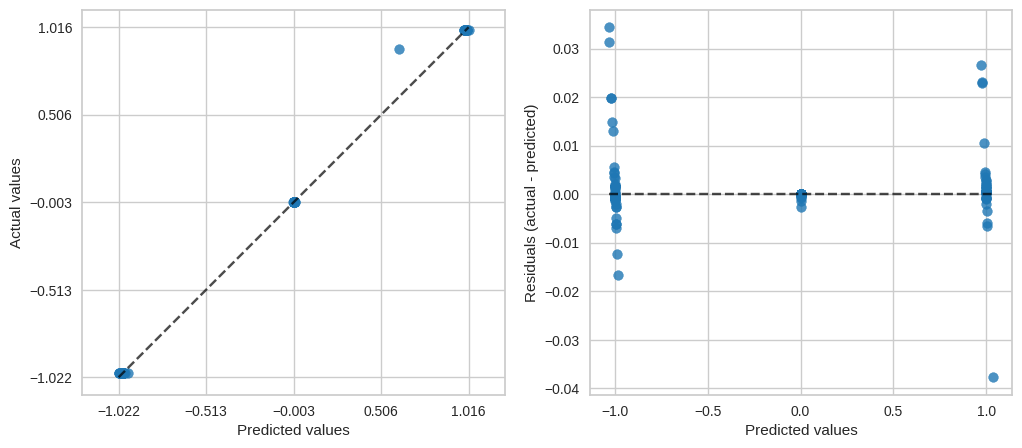

In [ ]:
from sklearn.metrics import PredictionErrorDisplay

hist_no_interact = HistGradientBoostingRegressor(
    interaction_cst=[[i] for i in range(x.shape[1])], random_state=0
)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
_ = PredictionErrorDisplay.from_estimator(
    hgb, x_train,y_pred, kind="actual_vs_predicted", ax=axs[0]
)
_ = PredictionErrorDisplay.from_estimator(
    hgb, x_train, y_pred, kind="residual_vs_predicted", ax=axs[1]
)

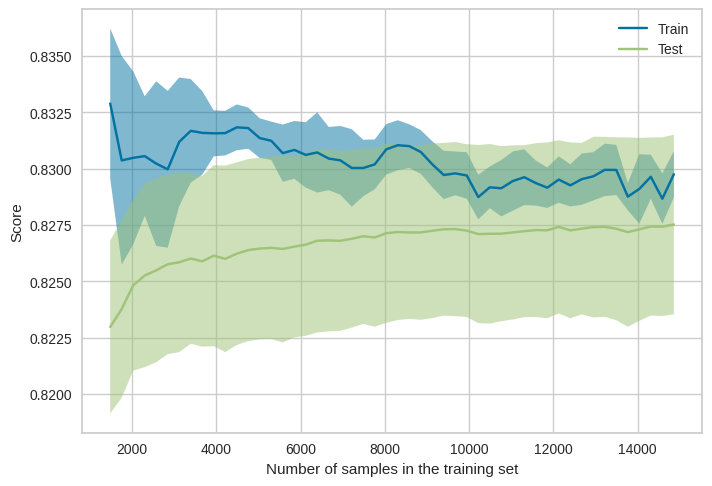

In [ ]:
from sklearn.model_selection import LearningCurveDisplay

_ = LearningCurveDisplay.from_estimator(
    hist_no_interact, x_train, y_pred, cv=5, n_jobs=2, train_sizes=np.linspace(0.1, 1, 50)
)

PARA MODIFICAR DEPOIS - usando libs como iris e diabetes

In [1]:
from sklearn import datasets
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
#iris = datasets.load_iris()
diabetes = load_diabetes()

X = diabetes.data        # shape (150, 4)
Y = diabetes.target      # valores 0,1,2


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=0
)

Gaussian Process Classificação

# 🤖 Gaussian Process Classificação (GPC)

A **Classificação com Processos Gaussianos** é um método bayesiano não-paramétrico onde, em vez de assumir uma forma fixa para o modelo, usamos um processo gaussiano para definir uma distribuição sobre funções.

Em problemas de **classificação binária**, o modelo assume que existe uma **função latente** \( f(x) \), sobre a qual aplicamos uma função sigmoide para obter a **probabilidade de uma classe**.

---

## 🧠 Modelo geral

1. Assumimos um processo gaussiano sobre a função latente:

$$
f(x) \sim \mathcal{GP}(0, k(x, x'))
$$

onde:

- \( f(x) \) é a função latente,
- \( k(x, x') \) é a função de covariância (kernel), que define a similaridade entre pontos.

---

2. Ligamos essa função latente à probabilidade da classe com uma função de ligação (por exemplo, a função logística ou probit):

### Com função logística:

$$
p(y=1 \mid x) = \sigma(f(x)) = \frac{1}{1 + e^{-f(x)}}
$$

---

## 🔁 Inferência

Como o modelo envolve uma **função não-linear da função latente**, a inferência exata não é possível. Usamos métodos de aproximação como:

- Laplace Approximation,
- Expectation Propagation (EP),
- Variational Inference.

O objetivo é calcular a **distribuição posterior** sobre a função latente \( f(x) \) dados os dados de treinamento \( \mathcal{D} = \{(x_i, y_i)\} \):

$$
p(f \mid \mathcal{D}) \approx \text{aproximação bayesiana}
$$

A partir disso, obtemos a **probabilidade preditiva para uma nova entrada \( x_* \)**:

$$
p(y_* = 1 \mid x_*, \mathcal{D}) = \int \sigma(f_*) \, p(f_* \mid x_*, \mathcal{D}) \, df_*
$$

---

✅ **Resumo**:

- GPC define uma distribuição sobre funções, não sobre parâmetros fixos.
- A saída é uma **probabilidade** de uma classe, e não uma decisão direta.
- Ideal para tarefas onde queremos medir incerteza nas previsões.



# O Papel do Kernel no Gaussian Process

No algoritmo de **Processo Gaussiano (GP)**, o **kernel** — também chamado de **função de covariância** — é o coração do modelo.

Ele define **como os pontos de entrada se relacionam entre si** e determina a forma das funções que o GP pode aprender.

---

## Intuição

A ideia é que pontos de entrada \( x \) e \( x' \) **mais semelhantes** devem ter **valores de função mais próximos**. O kernel formaliza essa "semelhança".

---

##  Fórmula do Processo Gaussiano

Assumimos que a função latente segue uma distribuição normal multivariada:

$$
f(x) \sim \mathcal{GP}(0, k(x, x'))
$$

Aqui:

- \( f(x) \): função latente (que modela os valores antes da função sigmoide),
- \( k(x, x') \): kernel — mede a similaridade entre os pontos \( x \) e \( x' \),
- A média é \( 0 \), mas pode ser diferente dependendo do problema.



### 📌 Kernel Linear:

$$
k(x, x') = x^\top x'
$$

- Induz funções lineares,
- Simples, mas pode ser limitado em problemas complexos.



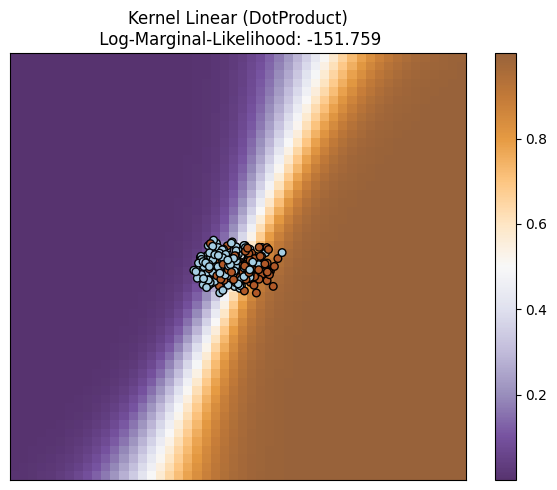

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Carregue o dataset
diabetes = load_diabetes()
X = diabetes.data        # shape (442, 10)
Y = (diabetes.target > diabetes.target.mean()).astype(int)  # binarização

# Split em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

# Reduza para 2D para visualização (usando apenas treino, para ajuste e plot)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Grid para plot
xx, yy = np.meshgrid(
    np.linspace(X_train_2d[:, 0].min()-1, X_train_2d[:, 0].max()+1, 50),
    np.linspace(X_train_2d[:, 1].min()-1, X_train_2d[:, 1].max()+1, 50)
)

# Kernel linear puro
kernel = 1.0 * DotProduct(sigma_0=1.0)

# Treine o modelo nos dados originais (todas as features)
clf = GaussianProcessClassifier(kernel=kernel, random_state=0)
clf.fit(X_train, Y_train)

# Para plotar, usamos as duas primeiras componentes principais
Z = clf.predict_proba(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 5))
image = plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
    alpha=0.8
)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], s=30, c=Y_train, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.colorbar(image)
plt.title(
    "Kernel Linear (DotProduct)\n Log-Marginal-Likelihood: %.3f"
    % (clf.log_marginal_likelihood(clf.kernel_.theta)),
    fontsize=12,
)

plt.tight_layout()
plt.show()

GaussianProcessRegressor

# 📈 Gaussian Process Regressor (GPR)

O **GaussianProcessRegressor** é um modelo de regressão que assume que os dados seguem uma **distribuição normal multivariada** definida por um **kernel** (função de covariância).

Diferente de modelos determinísticos, o GPR fornece **uma distribuição de probabilidade para cada predição**, incluindo **média e incerteza** (variância).

---

##  Intuição

A ideia é que os pontos \( x \) e \( x' \) que estão **mais próximos no espaço de entrada** devem gerar **valores de saída semelhantes**.

O **kernel** define essa noção de "proximidade" ou "semelhança" e dita a forma das funções que o modelo pode aprender.

---

## 📐 Fórmula do Processo Gaussiano

A função que queremos aprender segue uma distribuição:

$$
f(x) \sim \mathcal{GP}(\mu(x), k(x, x'))
$$

Onde:

- \( \mu(x) \): função média (geralmente \( 0 \)),
- \( k(x, x') \): função kernel, que define a covariância entre os pontos.

Dado um conjunto de treinamento \( X = [x_1, \dots, x_n] \) e seus valores alvo \( \mathbf{y} \), a predição para um novo ponto \( x_* \) é uma **distribuição Gaussiana**:

$$
f(x_*) \sim \mathcal{N}(\bar{f}_*, \mathbb{V}[f_*])
$$

Onde:

- \( \bar{f}_* \): valor médio previsto,
- \( \mathbb{V}[f_*] \): variância (incerteza) da predição.

---

## Predição (sem ruído de observação):

Suponha:

- \( K \): matriz de covariância entre os pontos de treino,
- \( k_* \): vetor de covariância entre os pontos de treino e \( x_* \),
- \( k_{**} \): covariância de \( x_* \) consigo mesmo.

As fórmulas são:

### Média da predição:

$$
\bar{f}_* = k_*^\top K^{-1} \mathbf{y}
$$

### Variância da predição:

$$
\mathbb{V}[f_*] = k_{**} - k_*^\top K^{-1} k_*
$$

---




#  Kernel Composto: DotProduct + WhiteKernel

No **Gaussian Process Regressor**, podemos combinar diferentes kernels para capturar diferentes características dos dados.

Neste caso, usamos:

$$
\text{kernel} = \text{DotProduct}(\sigma_0) + \text{WhiteKernel}(\text{noise\_level})
$$

---

##  Fórmula do Kernel Composto

A combinação resulta na seguinte função de covariância:

$$
k(x, x') = k_{\text{dot}}(x, x') + k_{\text{noise}}(x, x')
$$

Substituindo as fórmulas:

$$
k(x, x') = \sigma_0^2 + x^\top x' + \delta_{x = x'} \cdot \text{noise\_level}
$$

Onde:

- \( \sigma_0^2 \): parâmetro que adiciona um **viés fixo** à similaridade (do kernel de produto interno),
- \( x^\top x' \): **produto interno** entre os vetores de entrada (captura relações lineares),
- \( \delta_{x = x'} \): é 1 se \( x = x' \), e 0 caso contrário (do WhiteKernel),
- \( \text{noise\_level} \): representa o **nível de ruído** dos dados de entrada.

---

## ✅ O que isso significa?

- O `DotProduct kernel` captura **relações lineares globais** nos dados.
- O `WhiteKernel` adiciona **ruído nas medições**, o que melhora a robustez do modelo.
- A soma dos dois cria um modelo que é **linear e tolerante a ruídos**, ideal para muitos casos práticos de regressão.

---


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


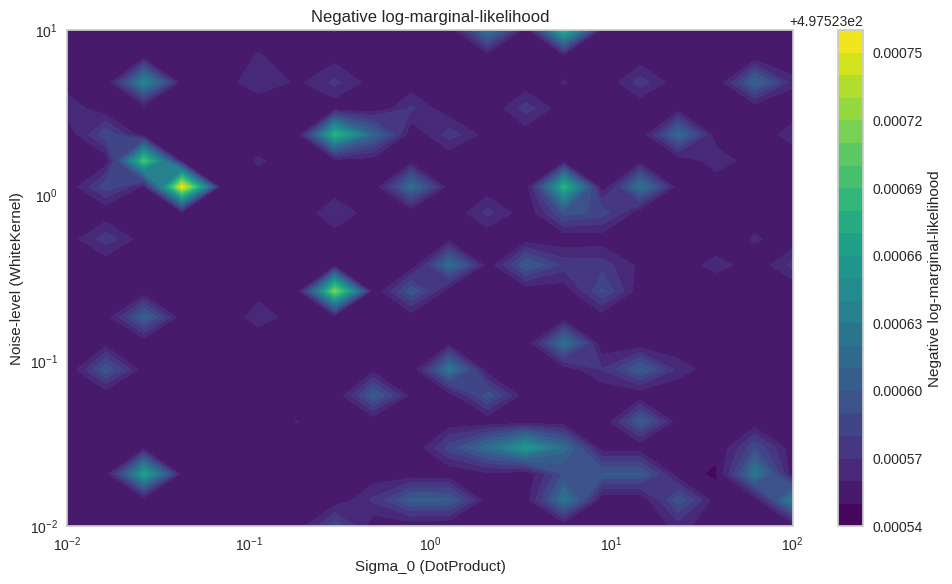

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar o dataset diabetes (substitua pelo seu)
diabetes = load_diabetes()
X = diabetes.data[:, 0].reshape(-1, 1)  # Usando apenas uma feature para simplificar
y = diabetes.target

# Dividir os dados


# Escalonar os dados boa pratica para esse tipo de algoritmo
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Definir os intervalos dos hiperparâmetros a serem explorados
param_grid = {
    "k1__sigma_0": np.logspace(-2, 2, 20),  # Variação para sigma_0 do DotProduct
    "k2__noise_level": np.logspace(-2, 1, 20), # Variação para noise_level do WhiteKernel
}

# Inicializar um array para armazenar os valores do NLML
nll_values = np.zeros((len(param_grid["k1__sigma_0"]), len(param_grid["k2__noise_level"])))

# Calcular o NLML para cada combinação de hiperparâmetros
for i, sigma_0 in enumerate(param_grid["k1__sigma_0"]):
    for j, noise_level in enumerate(param_grid["k2__noise_level"]):
        kernel = DotProduct(sigma_0=sigma_0) + WhiteKernel(noise_level=noise_level)
        gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
        gpr.fit(X_train_scaled, y_train_scaled)
        nll_values[i, j] = -gpr.log_marginal_likelihood(gpr.kernel_.theta)

# Criar o gráfico de contorno
plt.figure(figsize=(10, 6))
contour = plt.contourf(param_grid["k1__sigma_0"], param_grid["k2__noise_level"], nll_values.T, levels=20, cmap='viridis')
plt.colorbar(contour, label='Negative log-marginal-likelihood')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Sigma_0 (DotProduct)")
plt.ylabel("Noise-level (WhiteKernel)")
plt.title("Negative log-marginal-likelihood")
plt.grid(True)
plt.tight_layout()
plt.show()

LogisticRegression

# Regressão Logística Regularizada

A regressão logística é um modelo de classificação que usa a função sigmoide para prever probabilidades. A fórmula básica da regressão logística é:

$$ h_{\theta}(x) = \frac{1}{1 + e^{-\theta^T x}} $$



In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

#usar acuracioa e recall, f1-score e afins.
print("Acurácia:", accuracy_score(Y_test, Y_pred))
print("\nRelatório de classificação:")
print(classification_report(Y_test, Y_pred))

Acurácia: 0.7191780821917808

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78        79
           1       0.84      0.48      0.61        67

    accuracy                           0.72       146
   macro avg       0.76      0.70      0.70       146
weighted avg       0.75      0.72      0.70       146



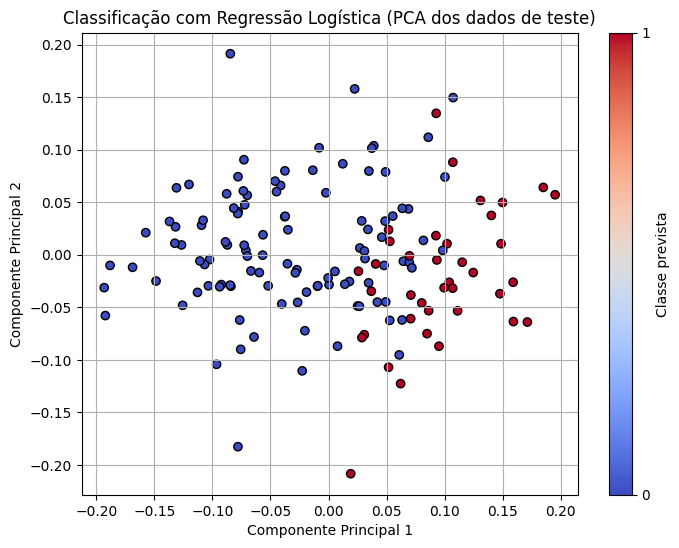

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_test_reduced = pca.fit_transform(X_test)

# Plotar os resultados da previsão
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_test_reduced[:, 0], X_test_reduced[:, 1],
    c=Y_pred, cmap='coolwarm', edgecolor='k'
)
plt.title("Classificação com Regressão Logística (PCA dos dados de teste)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(scatter, ticks=[0, 1], label='Classe prevista')
plt.grid(True)
plt.show()

 Support Vector Regression (SVR)

**Support Vector Regression (SVR)** é uma técnica de regressão derivada do **Support Vector Machine (SVM)**, usada para prever valores contínuos. O objetivo do SVR é encontrar uma função de previsão \( f(x) \) que se ajuste aos dados, mantendo a diferença entre o valor real \( y \) e o valor previsto \( f(x) \) dentro de uma margem \( \epsilon \).

A função de previsão \( f(x) \) é dada por:

$$ f(x) = \theta^T x + b $$

Onde:
- \( \theta \) são os coeficientes do modelo.
- \( b \) é o viés.

A função de custo do SVR, com regularização, é dada por:

$$ \min_{\theta, b} \frac{1}{2} \|\theta\|^2 $$



In [30]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
#comparar o svr com linear, polinomio e rbf -> ESTA SEM O KERNEL
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, Y_train)
#para  poder modificar
y_pred_data = regr.predict(X_test)

print("SVR (Data) — R²:", r2_score(Y_test, y_pred_data))
mse = mean_squared_error(Y_test, y_pred_data)
rmse = np.sqrt(mse)
print("SVR (Data) — RMSE:", rmse)

SVR (Data) — R²: 0.18888126090062562
SVR (Data) — RMSE: 0.4487870417898087


Best SVR with params: {'C': 1.0, 'gamma': np.float64(0.01)} and R2 score: 0.297
SVR complexity and bandwidth selected and model fitted in 1.911 s
Best KRR with params: {'alpha': 1.0, 'gamma': np.float64(0.01)} and R2 score: 0.329
KRR complexity and bandwidth selected and model fitted in 2.626 s


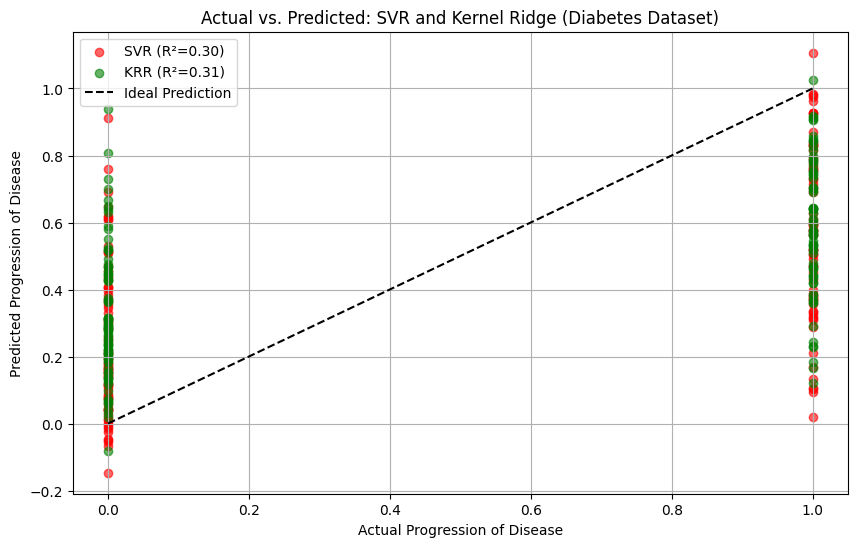

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score
import time

# Carregar o dataset diabetes
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target

# Escalonar as features e o target
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(Y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(Y_test.reshape(-1, 1)).flatten()

# Treinar o modelo SVR com GridSearchCV
svr = GridSearchCV(
    SVR(kernel="rbf", gamma='scale'),
    param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)},
    cv=5,
    scoring='r2'
)
t0 = time.time()
svr.fit(X_train_scaled, y_train_scaled)
svr_fit = time.time() - t0
print(f"Best SVR with params: {svr.best_params_} and R2 score: {svr.best_score_:.3f}")
print("SVR complexity and bandwidth selected and model fitted in %.3f s" % svr_fit)

# Treinar o modelo Kernel Ridge Regression com GridSearchCV
kr = GridSearchCV(
    KernelRidge(kernel="rbf", gamma='scale'),
    param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
    cv=5,
    scoring='r2'
)
t0 = time.time()
kr.fit(X_train_scaled, y_train_scaled)
kr_fit = time.time() - t0
print(f"Best KRR with params: {kr.best_params_} and R2 score: {kr.best_score_:.3f}")
print("KRR complexity and bandwidth selected and model fitted in %.3f s" % kr_fit)

# Fazer previsões nos dados de teste escalonados
y_svr_scaled_pred = svr.predict(X_test_scaled)
y_kr_scaled_pred = kr.predict(X_test_scaled)

# Inverter a escala das previsões
y_svr_pred = scaler_y.inverse_transform(y_svr_scaled_pred.reshape(-1, 1)).flatten()
y_kr_pred = scaler_y.inverse_transform(y_kr_scaled_pred.reshape(-1, 1)).flatten()
y_test_orig = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

svr_predict_time = 0  # Não estamos medindo o tempo de previsão separadamente aqui
kr_predict_time = 0

# Plotar os resultados (Valores Reais vs. Valores Previstos)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_orig, y_svr_pred, color='red', alpha=0.6, label=f'SVR (R²={r2_score(y_test_orig, y_svr_pred):.2f})')
plt.scatter(y_test_orig, y_kr_pred, color='green', alpha=0.6, label=f'KRR (R²={r2_score(y_test_orig, y_kr_pred):.2f})')
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], '--', color='black', label='Ideal Prediction')
plt.xlabel('Actual Progression of Disease')
plt.ylabel('Predicted Progression of Disease')
plt.title('Actual vs. Predicted: SVR and Kernel Ridge (Diabetes Dataset)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

regressor linear bayesiano

### 📈 Regressão Bayesiana e Regularização

Técnicas de regressão bayesiana podem ser usadas para incluir **parâmetros de regularização** no procedimento de estimativa. Nessa abordagem:

- O parâmetro de regularização **não é definido rigidamente**, mas **ajustado com base nos dados**.
- Isso é feito introduzindo **priores não informativos** sobre os **hiperparâmetros** do modelo.

#### 🧠 Regularização como Prior Gaussiano

A regularização utilizada em métodos como **Ridge Regression** pode ser interpretada como uma **estimativa a posteriori máxima** (MAP – *Maximum A Posteriori*) com um **prior Gaussiano** sobre os coeficientes \( \mathbf{w} \), da seguinte forma:

$$
p(\mathbf{w}) = \mathcal{N}(\mathbf{w} \mid 0, \lambda^{-1} \mathbf{I})
$$

Onde:

- \( \mathbf{w} \): vetor de coeficientes do modelo  
- \( \lambda \): **precisão** (o inverso da variância) do prior Gaussiano  
- \( \lambda \) pode ser tratado como uma **variável aleatória** a ser estimada dos dados, ao invés de ser definida manualmente

#### 📊 Modelo Probabilístico Completo

Para obter um **modelo totalmente probabilístico**, assumimos que a saída \( y \) é **gaussianamente distribuída** ao redor de uma função linear \( \mathbf{x}^\top \mathbf{w} \):

$$
p(y \mid \mathbf{x}, \mathbf{w}, \beta) = \mathcal{N}(y \mid \mathbf{x}^\top \mathbf{w}, \beta^{-1})
$$

Onde:

- \( \beta \): **precisão do ruído** (o inverso da variância da distribuição do erro)
- \( \beta \) também pode ser tratado como uma **variável aleatória**, estimada a partir dos dados

---

Essa abordagem resulta em um modelo **mais flexível**, que pode **ajustar automaticamente** os níveis de regularização com base nas evidências fornecidas pelos dados.


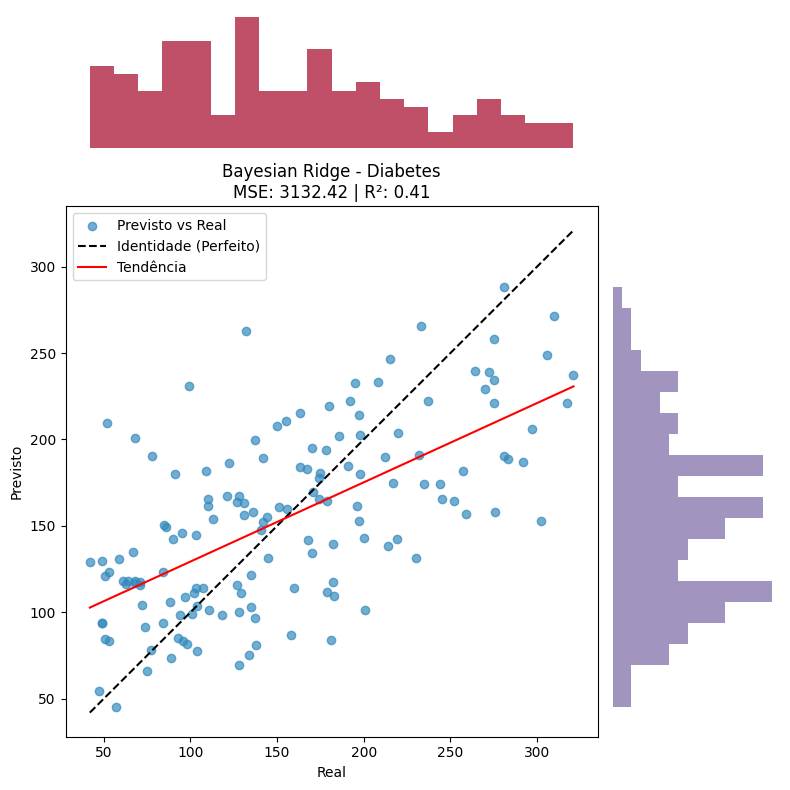

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Carregue o dataset
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target

# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

# Modelo
reg = BayesianRidge(tol=1e-6, fit_intercept=True, compute_score=True)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

# Métricas
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Linha de tendência (regressão linear entre Y_test e Y_pred)
trend = LinearRegression()
trend.fit(Y_test.reshape(-1,1), Y_pred)
Y_line = np.linspace(Y_test.min(), Y_test.max(), 100)
Y_trend = trend.predict(Y_line.reshape(-1,1))

# Plot com histogramas marginais
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(8, 8))
gs = GridSpec(4, 4)
ax_main = fig.add_subplot(gs[1:,:3])
ax_yhist = fig.add_subplot(gs[1:,3], sharey=ax_main)
ax_xhist = fig.add_subplot(gs[0,:3], sharex=ax_main)

# Scatter e linhas
ax_main.scatter(Y_test, Y_pred, alpha=0.7, label="Previsto vs Real", color="#348ABD")
ax_main.plot(Y_line, Y_line, 'k--', label="Identidade (Perfeito)")
ax_main.plot(Y_line, Y_trend, 'r-', label="Tendência")
ax_main.set_xlabel("Real")
ax_main.set_ylabel("Previsto")
ax_main.legend(loc="upper left")
ax_main.set_title(f"Bayesian Ridge - Diabetes\nMSE: {mse:.2f} | R²: {r2:.2f}")

# Histogramas
ax_xhist.hist(Y_test, bins=20, color="#A60628", alpha=0.7)
ax_xhist.axis("off")
ax_yhist.hist(Y_pred, bins=20, orientation='horizontal', color="#7A68A6", alpha=0.7)
ax_yhist.axis("off")

plt.tight_layout()
plt.show()

Stochastic Gradient Descent

### ⚙️ Gradiente Estocástico (SGD) com Regularização

Nesta seção, descrevemos os detalhes matemáticos do procedimento **Stochastic Gradient Descent (SGD)**. Uma boa visão geral com taxas de convergência pode ser encontrada em [12].

---

#### 🧠 Definição do Problema

Dado um conjunto de exemplos de treinamento:

$$
\{(\mathbf{x}_i, y_i)\}_{i=1}^n
$$

onde:

- \( \mathbf{x}_i \in \mathbb{R}^p \): vetor de atributos da \( i \)-ésima amostra  
- \( y_i \in \mathbb{R} \) (ou \( \{ -1, +1 \} \) para classificação binária)

Nosso objetivo é aprender uma **função de pontuação linear** da forma:

$$
f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b
$$

onde:

- \( \mathbf{w} \): vetor de pesos (parâmetros do modelo)  
- \( b \): intercepto (viés)

Para tarefas de **classificação binária**, a predição é feita olhando o **sinal de \( f(\mathbf{x}) \)**:

$$
\hat{y} = \text{sign}(f(\mathbf{x}))
$$

---

####  Função Objetivo com Regularização

Para encontrar os parâmetros do modelo, minimizamos o **erro de treinamento regularizado**, dado por:

$$
\min_{\mathbf{w}, b} \ \frac{1}{n} \sum_{i=1}^n L\left(y_i, \mathbf{w}^\top \mathbf{x}_i + b\right) + \alpha R(\mathbf{w})
$$

Onde:

- \( L(y_i, f(\mathbf{x}_i)) \): **função de perda** que mede o erro entre a predição e o valor real  
- \( R(\mathbf{w}) \): **termo de regularização**, também chamado de penalidade, que controla a complexidade do modelo  
- \( \alpha \geq 0


Complexity
The major advantage of SGD is its efficiency, which is basically linear in the number of training examples. If X is a matrix of size (n, p) training has a cost of
, where k is the number of iterations (epochs) and
 is the average number of non-zero attributes per sample.

Recent theoretical results, however, show that the runtime to get some desired optimization accuracy does not increase as the training set size increases.

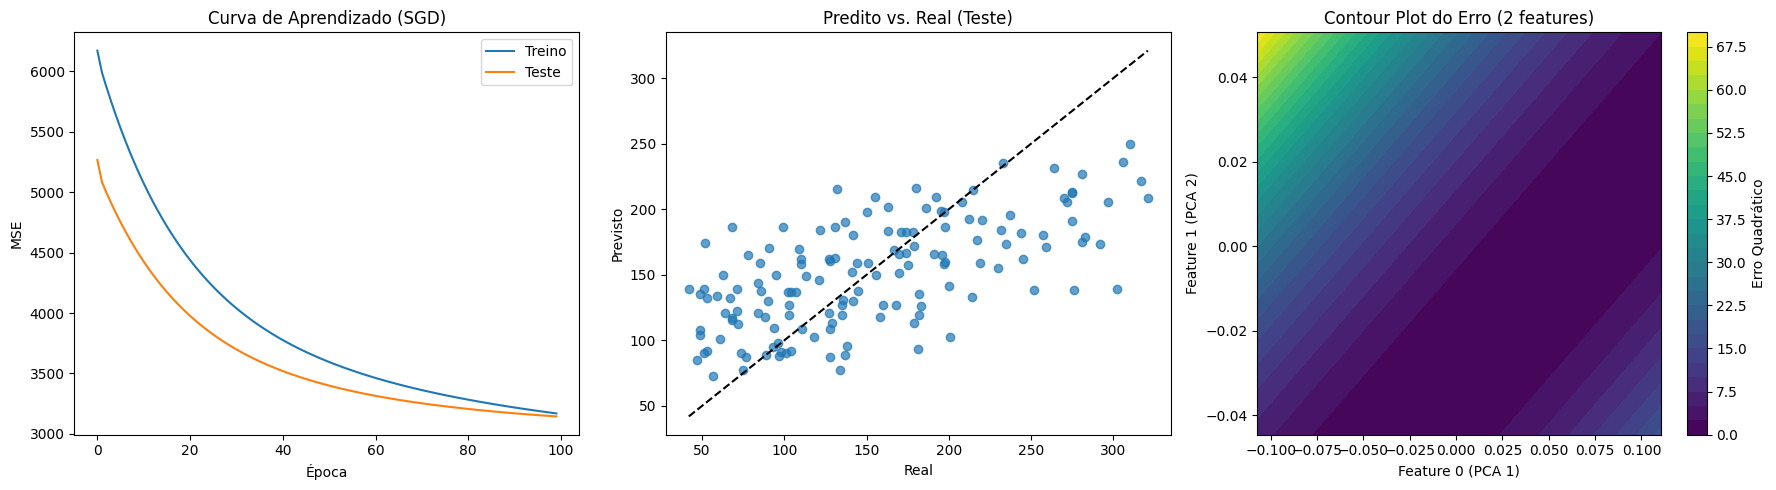

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Carregar dataset
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target

# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

# Configuração SGD
n_epochs = 100
train_mse = []
test_mse = []

sgd = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=0.01, random_state=0, warm_start=True)

for epoch in range(n_epochs):
    sgd.fit(X_train, Y_train)
    Y_pred_train = sgd.predict(X_train)
    Y_pred_test = sgd.predict(X_test)
    train_mse.append(mean_squared_error(Y_train, Y_pred_train))
    test_mse.append(mean_squared_error(Y_test, Y_pred_test))

# 1. Curva de aprendizado
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(train_mse, label="Treino")
plt.plot(test_mse, label="Teste")
plt.xlabel("Época")
plt.ylabel("MSE")
plt.title("Curva de Aprendizado (SGD)")
plt.legend()

# 2. Dispersão predito vs real
Y_pred = sgd.predict(X_test)
plt.subplot(1, 3, 2)
plt.scatter(Y_test, Y_pred, alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--')
plt.xlabel("Real")
plt.ylabel("Previsto")
plt.title("Predito vs. Real (Teste)")

# 3. Contour Plot do erro em relação a duas features
# Vamos variar as duas primeiras features, mantendo as demais fixas
f1 = 0  # primeira feature
f2 = 1  # segunda feature
grid_size = 50
feature1_range = np.linspace(X[:, f1].min(), X[:, f1].max(), grid_size)
feature2_range = np.linspace(X[:, f2].min(), X[:, f2].max(), grid_size)
xx, yy = np.meshgrid(feature1_range, feature2_range)
mse_grid = np.zeros_like(xx)

# Mantém as outras features fixas (na média do treino)
fixed = X_train.mean(axis=0)
for i in range(grid_size):
    for j in range(grid_size):
        x_point = fixed.copy()
        x_point[f1] = xx[i, j]
        x_point[f2] = yy[i, j]
        y_pred = sgd.predict([x_point])[0]
        mse_grid[i, j] = (y_pred - Y_train.mean())**2  # erro ao redor da média (ilustrativo)

plt.subplot(1, 3, 3)
contour = plt.contourf(xx, yy, mse_grid, levels=30, cmap="viridis")
plt.xlabel(f"Feature {f1} (PCA 1)")
plt.ylabel(f"Feature {f2} (PCA 2)")
plt.title("Contour Plot do Erro (2 features)")
plt.colorbar(contour, label='Erro Quadrático')
plt.tight_layout()
plt.show()

gradiente estocratico classifacao

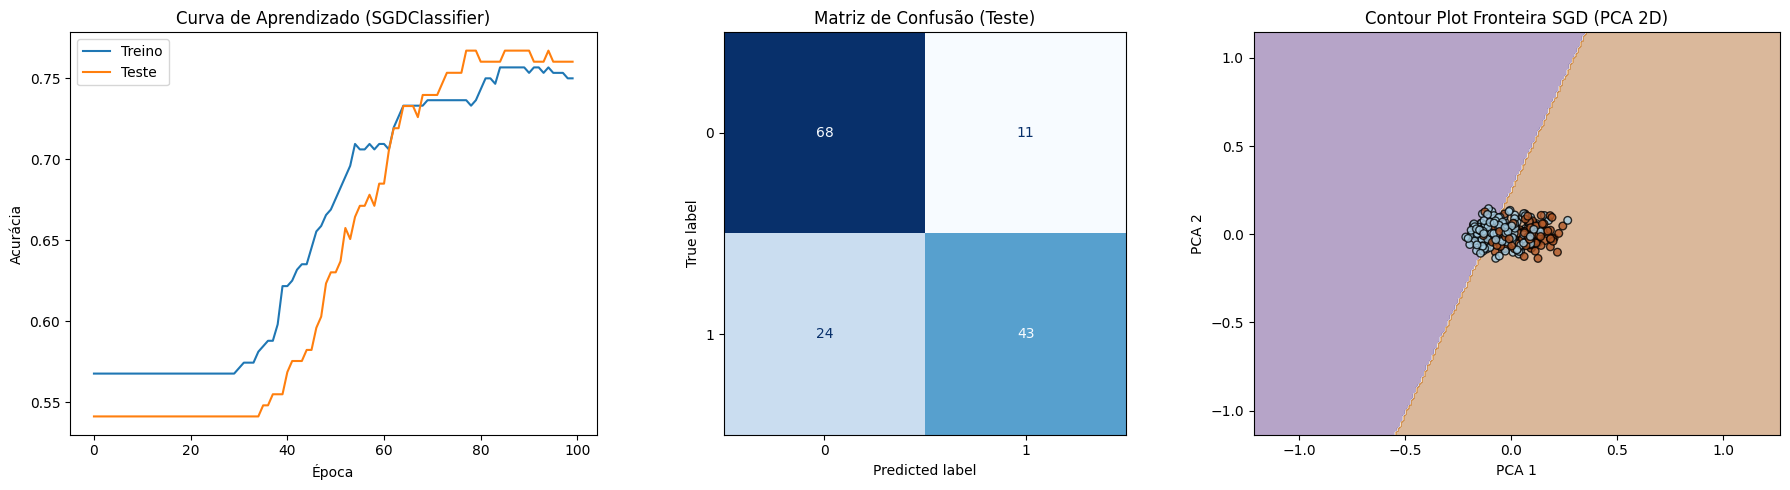

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# Carregar e dividir o dataset
diabetes = load_diabetes()
X = diabetes.data
Y = (diabetes.target > diabetes.target.mean()).astype(int)  # Binarização

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

# Configuração SGD
n_epochs = 100
train_acc = []
test_acc = []

sgd = SGDClassifier(max_iter=1, tol=None, learning_rate='constant', eta0=0.01, random_state=0, warm_start=True)

for epoch in range(n_epochs):
    sgd.fit(X_train, Y_train)
    Y_pred_train = sgd.predict(X_train)
    Y_pred_test = sgd.predict(X_test)
    train_acc.append(accuracy_score(Y_train, Y_pred_train))
    test_acc.append(accuracy_score(Y_test, Y_pred_test))

plt.figure(figsize=(18, 5))

# 1. Curva de aprendizado
plt.subplot(1, 3, 1)
plt.plot(train_acc, label="Treino")
plt.plot(test_acc, label="Teste")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.title("Curva de Aprendizado (SGDClassifier)")
plt.legend()

# 2. Matriz de confusão
Y_pred = sgd.predict(X_test)
plt.subplot(1, 3, 2)
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd.classes_)
disp.plot(ax=plt.gca(), cmap="Blues", colorbar=False)
plt.title("Matriz de Confusão (Teste)")

# 3. Contour Plot (fronteira de decisão em 2D - PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Treina SGD em 2D para visualização da fronteira
sgd_2d = SGDClassifier(max_iter=1000, tol=1e-3, random_state=0)
sgd_2d.fit(X_train_2d, Y_train)

# Malha para plotar fronteira
xx, yy = np.meshgrid(
    np.linspace(X_train_2d[:, 0].min()-1, X_train_2d[:, 0].max()+1, 200),
    np.linspace(X_train_2d[:, 1].min()-1, X_train_2d[:, 1].max()+1, 200)
)
Z = sgd_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.subplot(1, 3, 3)
plt.contourf(xx, yy, Z, cmap=plt.cm.PuOr_r, alpha=0.4)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=Y_train, cmap=plt.cm.Paired, edgecolor="k", s=30, alpha=0.8)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Contour Plot Fronteira SGD (PCA 2D)")

plt.tight_layout()
plt.show()

algoritimo voltingregressor

Regressor de Votação é uma técnica de conjunto poderosa que reúne múltiplos modelos de regressão para criar previsões mais confiáveis ​​e precisas. Ao calcular a média dos resultados desses modelos, ele ajuda a reduzir o risco de overfitting e garante uma melhor generalização para novos dados.

# Regressor de Votação (Voting Regressor)

O **Regressor de Votação** é uma técnica de ensemble que combina múltiplos modelos de regressão para criar uma previsão mais precisa e confiável. A técnica ajuda a reduzir o risco de overfitting e melhora a generalização para novos dados.


Se tivermos \( m \) modelos de regressão \( f_1, f_2, \dots, f_m \), a previsão final \( \hat{y} \) é dada pela média das previsões dos modelos:

$$
\hat{y} = \frac{1}{m} \sum_{i=1}^{m} f_i(x)
$$

Onde:
- \( f_i(x) \) é a previsão do \( i \)-ésimo modelo para o ponto \( x \),
- \( m \) é o número de modelos no conjunto.

Se a média for ponderada, a fórmula se torna:

$$
\hat{y} = \frac{\sum_{i=1}^{m} w_i f_i(x)}{\sum_{i=1}^{m} w_i}
$$

Onde:
- \( w_i \) é o peso do \( i \)-ésimo modelo (geralmente relacionado ao desempenho do modelo),
- \( f_i(x) \) é a previsão do \( i \)-ésimo modelo.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes  # Usando um dataset de exemplo; substitua pelo seu


In [24]:


# Escalonar as features (boa prática para alguns modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(Y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(Y_test.reshape(-1, 1)).flatten()

# Inicializar os regressores -> usando os 3 anntigos que ja foram usados
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = GradientBoostingRegressor(n_estimators=10, random_state=1) # Adicionando GradientBoostingRegressor
vr = VotingRegressor([('lr', r1), ('rf', r2), ('gb', r3)]) # Usando GradientBoostingRegressor

# Treinar os regressores
r1.fit(X_train_scaled, y_train_scaled)
r2.fit(X_train_scaled, y_train_scaled)
r3.fit(X_train_scaled, y_train_scaled)
vr.fit(X_train_scaled, y_train_scaled)

# Fazer previsões nos dados de treinamento
y_lr_pred_scaled = r1.predict(X_train_scaled)
y_rf_pred_scaled = r2.predict(X_train_scaled)
y_gb_pred_scaled = r3.predict(X_train_scaled)
y_vr_pred_scaled = vr.predict(X_train_scaled)

# Inverter o escalonamento das previsões
y_lr_pred = scaler.inverse_transform(y_lr_pred_scaled.reshape(-1, 1)).flatten()
y_rf_pred = scaler.inverse_transform(y_rf_pred_scaled.reshape(-1, 1)).flatten()
y_gb_pred = scaler.inverse_transform(y_gb_pred_scaled.reshape(-1, 1)).flatten()
y_vr_pred = scaler.inverse_transform(y_vr_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()



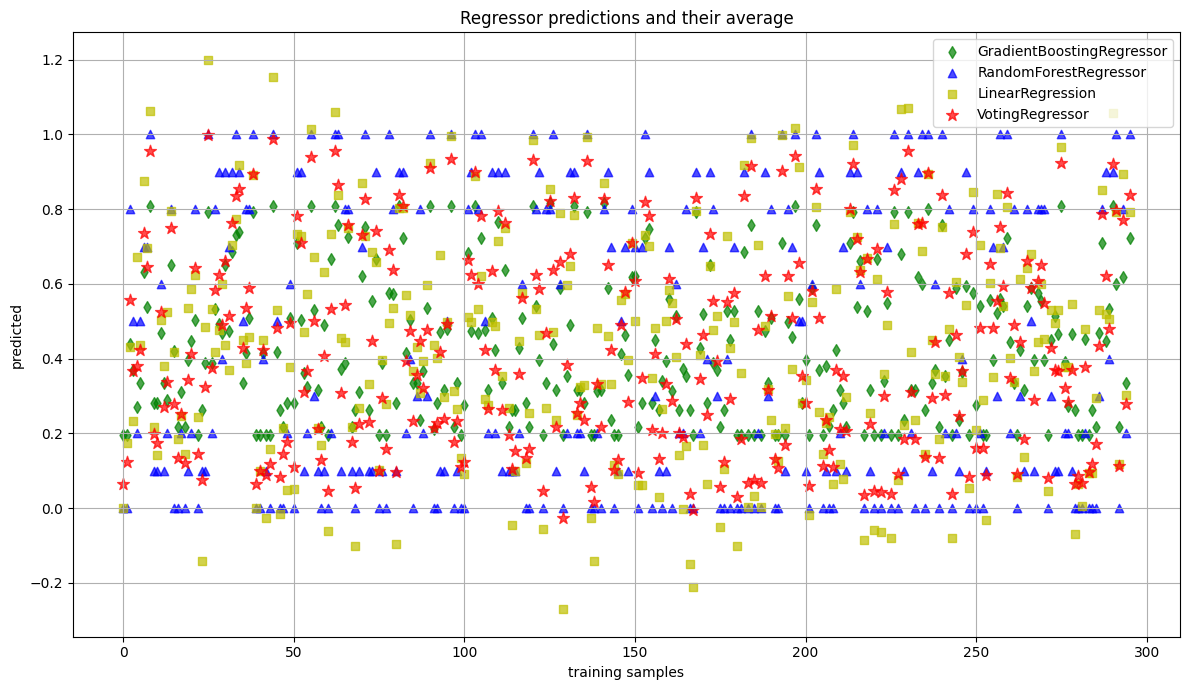

In [25]:
# Criar o plot
plt.figure(figsize=(12, 7))

# Plotar as previsões de cada regressor
plt.scatter(range(len(y_train_orig)), y_gb_pred, marker='d', color='green', label='GradientBoostingRegressor', alpha=0.7)
plt.scatter(range(len(y_train_orig)), y_rf_pred, marker='^', color='blue', label='RandomForestRegressor', alpha=0.7)
plt.scatter(range(len(y_train_orig)), y_lr_pred, marker='s', color='y', label='LinearRegression', alpha=0.7)
plt.scatter(range(len(y_train_orig)), y_vr_pred, marker='*', color='red', s=80, label='VotingRegressor', alpha=0.7)

# Adicionar rótulos e título
plt.xlabel('training samples')
plt.ylabel('predicted')
plt.title('Regressor predictions and their average')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Nearest Neighbors Regression (Regressão pelos Vizinhos Mais Próximos)

A **Regressão dos Vizinhos Mais Próximos (K-Nearest Neighbors Regression)** é uma técnica baseada em instâncias que realiza previsões com base na média dos valores dos \( k \) vizinhos mais próximos no conjunto de treinamento.

### Intuição

Dado um novo ponto \( x \), o modelo busca os \( k \) pontos de treinamento mais próximos de \( x \), com base em uma métrica de distância (geralmente a distância Euclidiana), e retorna a média dos valores-alvo \( y \) desses vizinhos como a previsão.

### Fórmula Matemática

Sejam os \( k \) vizinhos mais próximos de \( x \) dados por:

$$
\{(x_1, y_1), (x_2, y_2), \dots, (x_k, y_k)\}
$$

Então, a previsão \( \hat{y} \) para a entrada \( x \) é:

$$
\hat{y} = \frac{1}{k} \sum_{i=1}^{k} y_i
$$

### Distância Euclidiana

A distância entre dois pontos \( x \) e \( x_i \) (no espaço de características) é calculada por:

$$
d(x, x_i) = \sqrt{\sum_{j=1}^{n} (x_j - x_{i,j})^2}
$$

Onde:
- \( n \) é o número de características,
- \( x_j \) e \( x_{i,j} \) são os componentes da entrada e do vizinho, respectivamente.


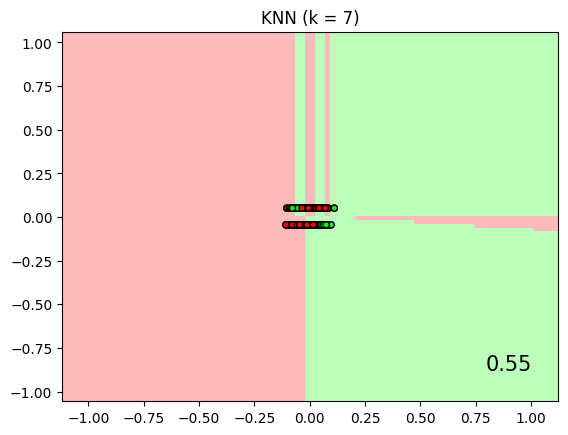

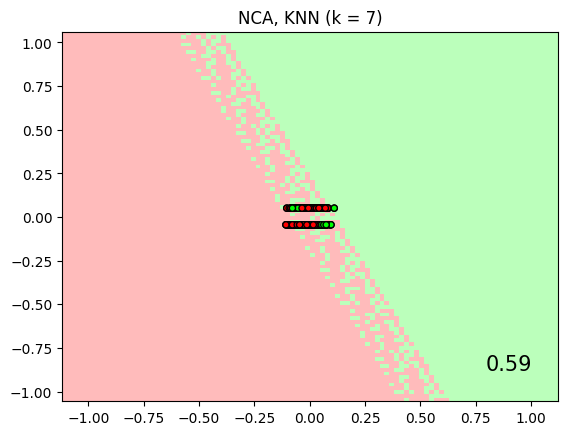

In [38]:
# Carregar o dataset e selecionar 2 features para visualização
diabetes = load_diabetes()
X = diabetes.data[:, :2]  # Usando apenas as duas primeiras features
Y = (diabetes.target > diabetes.target.mean()).astype(int)  # Exemplo: binarizando o target

h = 0.05  # step size in the mesh

# Colormaps
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00"])

n_neighbors = 7

names = ["KNN", "NCA, KNN"]

classifiers = [
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("nca", NeighborhoodComponentsAnalysis()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
]

# Dividir em treino/teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0, stratify=Y)

for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        alpha=0.8,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
    )

    # Plotar os pontos
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title(f"{name} (k = {n_neighbors})")
    plt.text(
        0.9,
        0.1,
        "{:.2f}".format(score),
        size=15,
        ha="center",
        va="center",
        transform=plt.gca().transAxes,
    )

plt.show()